# Introduction to Tensorflow and Tensorflow lite Workshop

## What is Tensorflow?

**TensorFlow is an end-to-end open source platform for machine learning with a comprehensive, flexible ecosystem of tools, libraries and community resources.**


 
 

# TensorFlow basics

In [0]:
try:
    %tensorflow_version 2.x
except:
    pass

In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pathlib


print(tf.__version__)

2.0.0


Tensorflow has different variation of tensors
.constant,
.random .


In [5]:
#constant tensor
x = tf.constant([[1, 2], [3, 4]])
print(x)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


Another way constant tensors are created using `tf.ones` and `tf.zeroes`

In [6]:
print(tf.ones(shape=(2, 1)))
print(tf.zeros(shape=(2, 1)))

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [7]:
#You can declare a random tensor by:

tf.random.normal(shape=(3, 3), mean=0., stddev=1.)


<tf.Tensor: id=12, shape=(3, 3), dtype=float32, numpy=
array([[ 0.92151266, -1.6761822 ,  0.06845541],
       [ 1.0399439 ,  2.407184  ,  0.26581106],
       [ 0.93184406, -0.11953061, -0.70880646]], dtype=float32)>

In [7]:
#random uniform tensor

tf.random.uniform(shape=(2, 2), minval=0, maxval=10, dtype='int32')

<tf.Tensor: id=16, shape=(2, 2), dtype=int32, numpy=
array([[3, 5],
       [4, 5]], dtype=int32)>

## Variables

Variables are special tensors used to store mutable state (like the weights of a neural network). You create a Variable using some initial value.

In [8]:
initial_value = tf.random.normal(shape=(2, 2))
v = tf.Variable(initial_value)
print(v)

<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[ 1.3115387 , -0.2584394 ],
       [ 0.18615824,  1.382142  ]], dtype=float32)>


You update the value of a Variable by using the methods `assign(value)`, or `assign_add(increment)` or `assign_sub(decrement)`:

In [0]:
new_value = tf.random.normal(shape=(2, 2))
v.assign(new_value)
for i in range(2):
  for j in range(2):
    assert v[i, j] == new_value[i, j]

In [0]:
added_value = tf.random.normal(shape=(2, 2))
v.assign_add(added_value)
for i in range(2):
  for j in range(2):
    assert v[i, j] == new_value[i, j] + added_value[i, j]

## MAT 101: Tensorflow Arthmetics 

Simple math, as well as complex math can be done using tensorflow.
Let's see a few

### Addition and Subtraction

In [0]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

c = a + b
d = tf.square(c)
e = tf.exp(d)

In [12]:
print("a", a)
print("b", b)
print("c", c)
print("d", d)
print("e", e)

a tf.Tensor(
[[ 1.0364131e-03 -9.6974921e-01]
 [-2.0420582e+00 -4.9199268e-01]], shape=(2, 2), dtype=float32)
b tf.Tensor(
[[-0.15349092 -0.13893835]
 [-0.807484   -0.4876446 ]], shape=(2, 2), dtype=float32)
c tf.Tensor(
[[-0.1524545  -1.1086875 ]
 [-2.8495421  -0.97963727]], shape=(2, 2), dtype=float32)
d tf.Tensor(
[[0.02324237 1.229188  ]
 [8.11989    0.9596892 ]], shape=(2, 2), dtype=float32)
e tf.Tensor(
[[1.0235146e+00 3.4184525e+00]
 [3.3606519e+03 2.6108849e+00]], shape=(2, 2), dtype=float32)


### Basic model of form y = mx + c

In [13]:
# Create a simple Keras model.
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x, y, epochs=200, verbose=1)

Train on 6 samples
Epoch 1/200
6/6 [==============================] - 1s 125ms/sample - loss: 23.0307
Epoch 2/200
6/6 [==============================] - 0s 2ms/sample - loss: 18.4005
Epoch 3/200
6/6 [==============================] - 0s 2ms/sample - loss: 14.7519
Epoch 4/200
6/6 [==============================] - 0s 2ms/sample - loss: 11.8757
Epoch 5/200
6/6 [==============================] - 0s 2ms/sample - loss: 9.6074
Epoch 6/200
6/6 [==============================] - 0s 1ms/sample - loss: 7.8173
Epoch 7/200
6/6 [==============================] - 0s 2ms/sample - loss: 6.4036
Epoch 8/200
6/6 [==============================] - 0s 2ms/sample - loss: 5.2862
Epoch 9/200
6/6 [==============================] - 0s 2ms/sample - loss: 4.4020
Epoch 10/200
6/6 [==============================] - 0s 2ms/sample - loss: 3.7014
Epoch 11/200
6/6 [==============================] - 0s 2ms/sample - loss: 3.1452
Epoch 12/200
6/6 [==============================] - 0s 2ms/sample - loss: 2.7029
Epoch 13/200

In [14]:
export_dir = 'saved_model/1'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/1/assets


In [0]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()


In [16]:
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

780

In [0]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [0]:
# Test the TensorFlow Lite model on random input data.
input_shape = input_details[0]['shape']
inputs, outputs = [], []
for _ in range(100):
  input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
  interpreter.set_tensor(input_details[0]['index'], input_data)

  interpreter.invoke()
  tflite_results = interpreter.get_tensor(output_details[0]['index'])

  # Test the TensorFlow model on random input data.
  tf_results = model(tf.constant(input_data))
  output_data = np.array(tf_results)
  
  inputs.append(input_data[0][0])
  outputs.append(output_data[0][0])

###Let's see our model

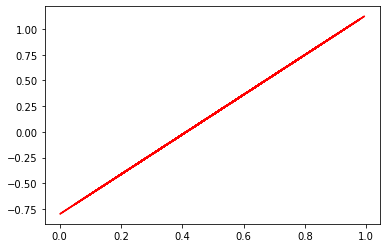

In [19]:
plt.plot(inputs, outputs, 'r')
plt.show()

Download the model

In [0]:
try:
  from google.colab import files
  files.download(tflite_model_file)
except:
  pass

## Computing gradients with GradientTape

Oh, and there's another big difference with Numpy: you can automatically retrieve the gradient of any differentiable expression.
Just open a GradientTape, start "watching" a tensor via tape.watch(), and compose a differentiable expression using this tensor as input:

In [22]:
a = tf.random.normal(shape=(2, 2))
b = tf.random.normal(shape=(2, 2))

with tf.GradientTape() as tape:
    tape.watch(a)  # Start recording the history of operations applied to `a`
    c = tf.sqrt(tf.square(a) + tf.square(b))  # Do some math using `a`
  # What's the gradient of `c` with respect to `a`?
    dc_da = tape.gradient(c, a)
print(dc_da)

tf.Tensor(
[[-0.08683333  0.5939565 ]
 [ 0.49717274 -0.9993805 ]], shape=(2, 2), dtype=float32)


By default, variables are watched automatically, so you don't need to manually watch them:

In [23]:
a = tf.Variable(a)

with tf.GradientTape() as tape:
    c = tf.sqrt(tf.square(a) + tf.square(b))
    dc_da = tape.gradient(c, a)
print(dc_da)

tf.Tensor(
[[-0.08683333  0.5939565 ]
 [ 0.49717274 -0.9993805 ]], shape=(2, 2), dtype=float32)


You can also compute higher-order derivatives by nesting tapes:

In [25]:
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as tape:
      c = tf.sqrt(tf.square(a) + tf.square(b))
      dc_da = tape.gradient(c, a)
      d2c_da2 = outer_tape.gradient(dc_da, a)
print(d2c_da2)

tf.Tensor(
[[8.0265689e-01 5.5767441e-01]
 [1.1933215e+00 6.3484907e-04]], shape=(2, 2), dtype=float32)


## An end-to-end example: linear regression

TensorFlow is a Numpy-like library that is GPU or TPU accelerated, with automatic differentiation. Time for an end-to-end example: let's implement a linear regression, the FizzBuzz of Machine Learning. 

For the sake of demonstration, we won't use any of the higher-level Keras components like `Layer` or `MeanSquaredError`. Just basic ops.

In [0]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

# This is our weight matrix
w = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
# This is our bias vector
b = tf.Variable(tf.zeros(shape=(output_dim,)))

def compute_predictions(features):
    return tf.matmul(features, w) + b

def compute_loss(labels, predictions):
    return tf.reduce_mean(tf.square(labels - predictions))

def train_on_batch(x, y):
    with tf.GradientTape() as tape:
      predictions = compute_predictions(x)
      loss = compute_loss(y, predictions)
    # Note that `tape.gradient` works with a list as well (w, b).
      dloss_dw, dloss_db = tape.gradient(loss, [w, b])
      w.assign_sub(learning_rate * dloss_dw)
      b.assign_sub(learning_rate * dloss_db)
    return loss

Let's generate some artificial data to demonstrate our model:

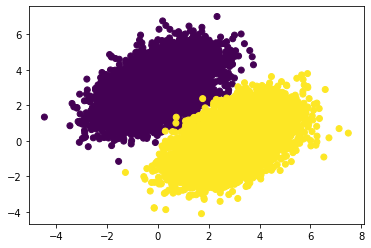

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare a dataset.
num_samples = 10000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples)
features = np.vstack((negative_samples, positive_samples)).astype(np.float32)
labels = np.vstack((np.zeros((num_samples, 1), dtype='float32'),
                    np.ones((num_samples, 1), dtype='float32')))

plt.scatter(features[:, 0], features[:, 1], c=labels[:, 0])

In [0]:
Now let's train our linear regression by iterating over batch-by-batch over the data and repeatedly calling train_on_batch:

In [30]:
# Shuffle the data.
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]

# Create a tf.data.Dataset object for easy batched iteration
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

for epoch in range(10):
    for step, (x, y) in enumerate(dataset):
      loss = train_on_batch(x, y)
print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 9: last batch loss = 0.0180


Here's how our model performs:

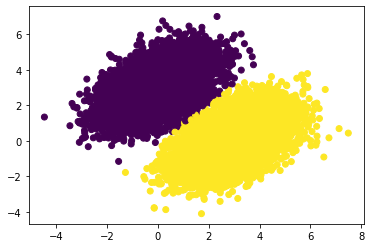

In [31]:
predictions = compute_predictions(features)
plt.scatter(features[:, 0], features[:, 1], c=predictions[:, 0] > 0.5)

## Making it fast with `tf.function`

But how fast is our current code running?

In [33]:
import time

t0 = time.time()
for epoch in range(20):
    for step, (x, y) in enumerate(dataset):
      loss = train_on_batch(x, y)
      t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))


Time per epoch: 0.134 s


Let's compile the training function into a static graph. Literally all we need to do is add the tf.function decorator on it:

In [0]:
@tf.function
def train_on_batch(x, y):
    with tf.GradientTape() as tape:
      predictions = compute_predictions(x)
      loss = compute_loss(y, predictions)
      dloss_dw, dloss_db = tape.gradient(loss, [w, b])
      w.assign_sub(learning_rate * dloss_dw)
      b.assign_sub(learning_rate * dloss_db)
    return loss

Let's try this again:

In [37]:
t0 = time.time()
for epoch in range(20):
    for step, (x, y) in enumerate(dataset):
      loss = train_on_batch(x, y)
      t_end = time.time() - t0
print('Time per epoch: %.3f s' % (t_end / 20,))

Time per epoch: 0.084 s


# Thank you!!